# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("titanic_train.csv")

In [3]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Exploratory Data Analysis

## Missing data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
df_train.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
846,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


<AxesSubplot:>

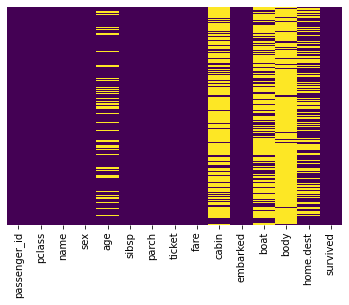

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

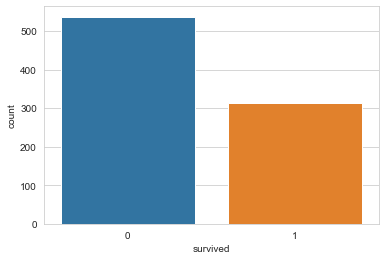

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df_train)

<AxesSubplot:xlabel='survived', ylabel='count'>

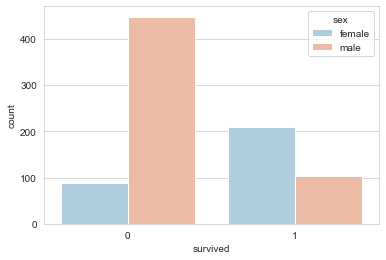

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df_train,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

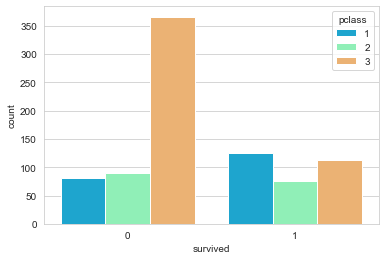

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df_train,palette='rainbow')

<AxesSubplot:xlabel='age'>

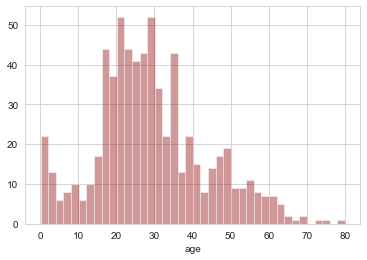

In [12]:
sns.distplot(df_train['age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

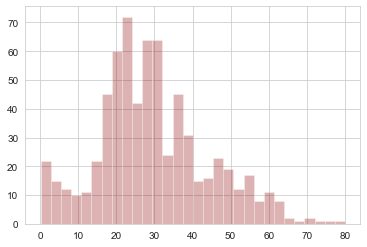

In [17]:
df_train['age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

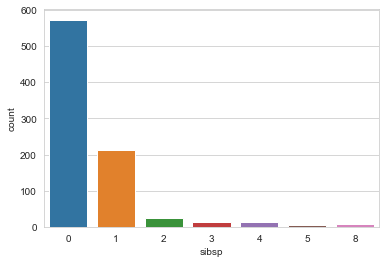

In [18]:
sns.countplot(x='sibsp', data=df_train)

## Data Cleaning

<AxesSubplot:xlabel='pclass', ylabel='age'>

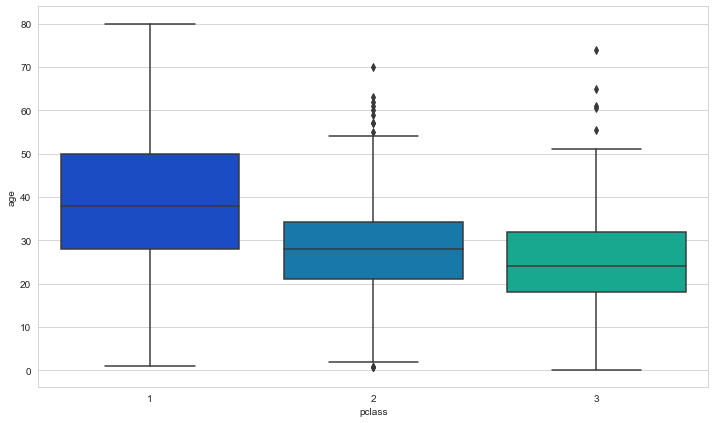

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=df_train, palette='winter')

In [23]:
def impute_age(cols):
    age = cols[0]
    pclass= cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [24]:
df_train['age'] = df_train[['age','pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

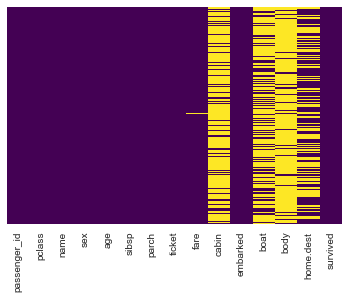

In [26]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df_train.drop(['cabin','boat','body'],axis=1,inplace=True)

In [32]:
df_train.drop(['home.dest'],axis=1,inplace=True)

In [33]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [34]:
df_train.dropna(inplace=True)

<AxesSubplot:>

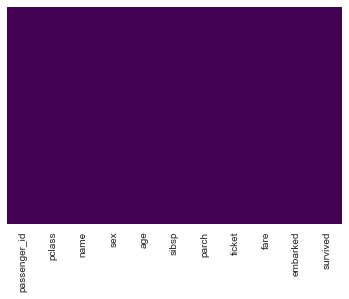

In [35]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
pd.get_dummies(df_train['embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
sex1 = pd.get_dummies(df_train['sex'],drop_first=True)
embark = pd.get_dummies(df_train['embarked'],drop_first=True)

In [40]:
df_train.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [41]:
df_train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived
0,1216,3,24.0,0,0,7.7333,1
1,699,3,38.0,0,0,8.6625,0
2,1267,3,30.0,1,1,24.1500,0
3,449,2,54.0,1,3,23.0000,1
4,576,2,40.0,0,0,13.0000,0


In [43]:
df_train = pd.concat([df_train,sex1,embark],axis=1)

In [44]:
df_train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,1216,3,24.0,0,0,7.7333,1,0,1,0
1,699,3,38.0,0,0,8.6625,0,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,0,0,1
4,576,2,40.0,0,0,13.0000,0,1,0,1
